In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans

## Introduction
 There was a data of Auto Mobile that include specification, losses and risk of the Vehicle. We want to see the cluster of that vehicle by K-Means, Hierarchical, and DBSCAN Algorithm.

### Load Data

In [0]:
lossesb = pd.read_csv('automobile-losses.csv')
losses=lossesb.drop(columns=['ID'])
riskb = pd.read_csv('automobile-risk.csv')
risk=riskb.drop(columns=['ID'])
spec = pd.read_csv('automobile-spec.csv')

In [67]:
losses.tail()

,normalized-losses
200,95.0
201,95.0
202,95.0
203,95.0
204,95.0


In [68]:
risk.head()

,symboling
0,3
1,3
2,1
3,2
4,2


In [69]:
spec.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,height,curb-weight,engine-type,cylinder,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Merging Dataset

Because there was three dataset, we will merge losses, risk, and spec table.

In [0]:
dataset =  pd.concat(objs=[spec, risk, losses], axis=1).reset_index(drop=True)

In [72]:
dataset.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,height,curb-weight,engine-type,cylinder,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3,NaN
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3,NaN
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,NaN
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2,164.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2,164.0


### Data Information

In [73]:
dataset.shape

(205, 27)

There was 205 rows 27 features on the dataset. It show that there was 5535 record in the dataset.

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

We can see that there was 17 numerical features and 10 categorical features on the dataset.

Because we want to make a model using K-Means, Hierarchical, and DBSCAN, the feature that has a categorical type will be drop.
      

In [75]:
data=dataset.drop(columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheel', 'engine-loc', 'engine-type', 'cylinder', 'fuel-system'])
data.head()

,ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3,NaN
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3,NaN
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,NaN
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2,164.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2,164.0


### Missing Values

#### Checking the Missing Values

In [76]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values

normalized-losses    41
bore                  4
stroke                4
price                 4
peak-rpm              2
horsepower            2
highway-mpg           0
city-mpg              0
compression-ratio     0
symboling             0
engine-size           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
ID                    0
dtype: int64

#### Fill the Missing Values

In [77]:
datafix=data.fillna('0')
datafix.isnull().sum()

ID                   0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
symboling            0
normalized-losses    0
dtype: int64

## Normalizing Data

We want to normalize the data by making them to array

In [78]:
X = np.asarray(datafix)
X

array([[1, 88.6, 168.8, ..., 13495.0, 3, '0'],
       [2, 88.6, 168.8, ..., 16500.0, 3, '0'],
       [3, 94.5, 171.2, ..., 16500.0, 1, '0'],
       ...,
       [203, 109.1, 188.8, ..., 21485.0, -1, 95.0],
       [204, 109.1, 188.8, ..., 22470.0, -1, 95.0],
       [205, 109.1, 188.8, ..., 22625.0, -1, 95.0]], dtype=object)

## K-Means Algorithm

### Finding the best K

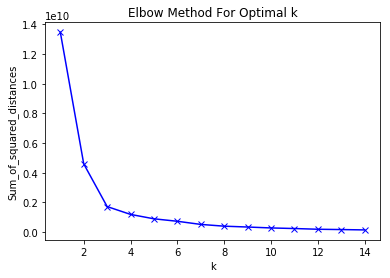

In [79]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the Scree Plot we know that 3 is the best cluster because the decreasement is not too far away.

In [80]:
from sklearn.preprocessing import StandardScaler
X = datafix.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.6907718 , -0.42652147, -0.84478235, ...,  0.06769444,
         1.74347043, -1.67871386],
       [-1.6907718 , -0.42652147, -0.84478235, ...,  0.44055495,
         1.74347043, -1.67871386],
       [-0.70859588, -0.23151305, -0.19056612, ...,  0.44055495,
         0.133509  , -1.67871386],
       ...,
       [ 1.72187336,  1.19854871,  1.39824472, ...,  1.05909393,
        -1.47645244, -0.04471984],
       [ 1.72187336,  1.19854871,  1.39824472, ...,  1.18131276,
        -1.47645244, -0.04471984],
       [ 1.72187336,  1.19854871,  1.39824472, ...,  1.20054517,
        -1.47645244, -0.04471984]])

### Clustering Model

In [81]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 2 2 1 1 1 1 1 1
 1 2 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 1 1 1 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 2 2 0 0 0
 0 0 0 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2]


In [87]:
datafix["Cluster"] = labels
datafix.head()

,ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses,Cluster
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495,3,0,2
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,3,0,2
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,1,0,2
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950,2,164,2
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450,2,164,2


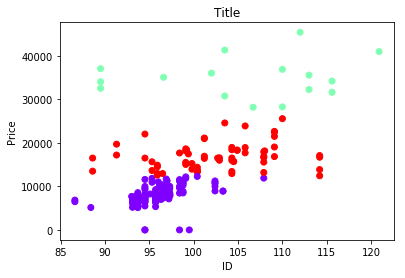

In [84]:
plt.scatter(X[:,0], X[:,13], c=k_means.labels_, cmap='rainbow')
plt.xlabel("ID")
plt.ylabel("Price")
plt.title("Title")
plt.show()

In [89]:
datafix['Cluster'].value_counts()

0    124
2     65
1     16
Name: Cluster, dtype: int64

Based on the Scatter Plot, we can see that :
- Cluster on the blue line is the cluster 0 with the lowest price of Vehicle which the range of the price is between 0-12000. From 250 data, cluster 0 is the highest amount with 124 costumer that buying a car in the low price. 
- Cluster on the red line is the cluster 1 with the middle price of vehicle which the range of the price is between 12000 till 26000. From 250 data, cluster 1 have the 65 amount of costumer.
- Cluster on the green line is the cluster 2 with the highest price of Vehicle which the range of the price is between 27000 till more than 40000. From 250 data, cluster 2 have the 16 amount of costumer.

**It means that consumer is prefer to buying a car with a lower price because the amount of the cluster 0 is the highest amount than the other cluster**

## Hierarchical Algortihm

### Dendogram

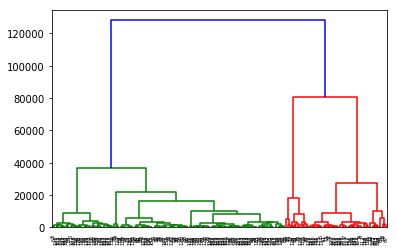

In [93]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

The linkage of this dendogram is using ward because it has the best visualization. 

Based on the dendogram, we can see that there was 3 cluster in this data using hierarchical algorithm.

### Fitting

In [97]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

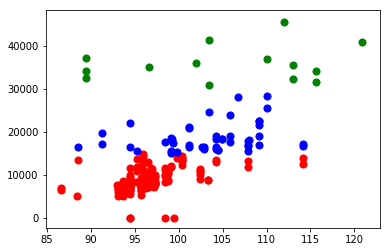

In [99]:
plt.scatter(X[labels==0, 0], X[labels==0, 13], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 13], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 13], s=50, marker='o', color='green')
plt.show()

Based on the Scatter Plot, we can see that :
- Cluster on the blue line is the cluster 0 with the lowest price of Vehicle which the range of the price is between 0-15000.
- Cluster on the red line is the cluster 1 with the middle price of vehicle which the range of the price is between 12000 till 26000. 
- Cluster on the green line is the cluster 2 with the highest price of Vehicle which the range of the price is between 27000 till more than 40000. 

**It means that consumer is prefer to buying a car with a lower price because the amount of the cluster 0 is the highest amount than the other cluster**

## DBSCAN

In [135]:
from sklearn.cluster import DBSCAN
epsilon = 3000
minimumSamples = 3
dbscan = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

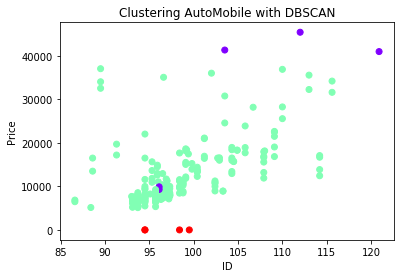

In [136]:
plt.scatter(X[:,0],X[:,13], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("ID")
plt.ylabel("Price")
plt.title("Clustering AutoMobile with DBSCAN")
plt.show()

Based on the Scatter Plot, we can see that :
- Cluster on the blue line is the cluster 1 with the highest price of Vehicle which the range of the price is more than 40000. From 250 data, cluster 1 has 3 amount.
- Cluster on the green line is the cluster 0 with the middle price of vehicle which the range of the price is between 3000 till 38000. From 250 data, cluster 1 have the highest amount with 241 amount of costumer. 
- Cluster on the red line is the cluster -1 with the lowest price of Vehicle which the range of the price is more than zero but under 4000. From 250 data, cluster -1 have the 6 amount of costumer.

**It means that there was too much outlier in cluster 0 because it has the highest amount. But, It can be means that costumer is prefer to buy a car in the middle price on the cluster 0**

In [139]:
datafix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
ID                   205 non-null int64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
symboling            205 non-null int64
normalized-losses    205 non-null object
Cluster              205 non-null int32
dtypes: float64(5), int32(1), int64(6), object(6)
memory usage: 28.1+ KB


# Answering The Question

### 1. Berapa Cluster yang Anda buat? Anda menggunakan atribut/feature apa saja.

Cluster yang dibuat yaitu 3 berdasarkan perhitungan cluster pada k-means, dendogram dan DBSCAN Epsilon.

Feature yang saya gunakan untuk penentuan cluster adalah 
ID, wheel-base, length, width, height, curb-weight, engine-size, bore, stroke, compression-ratio, horsepower, peak-rpm
city-mpg, highway-mpg, price, symboling, normalized-losses. Karena ***fitur tersebut memiliki type data numeric yang dapat digunakan dalam ketiga algoritma clustering k-means, hierarchical dan DBSCAN.***

Akan tetapi dalam visualisasi cluster nya saya menggunakan features **price** karena harga merupakan salah satu pertimbangan konsumen ketika membeli mobil.

### 2. Manakah Algoritma Clustering yang Anda ambil? Mengapa?

Saya memilih algorima k-means karena kluster dapat ditentukan dengan tepat berdasarkan perhitungan cluster menggunakan scree plot.

### 3. Apakah Masing-Masing Cluster memiliki ciri-ciri yang berbeda? Apa saja ciri-ciri masing-masing cluster?

Masing-Masing Cluster memiliki ciri yang berbeda yaitu pada setiap range data yang ada yang terbagi menjadi cluster dengan harga rendah, menengah dan tinggi.